# Import dependencies

We need a couple of dependencies to consume the API and do some analysis.

In [52]:
from app.utils.config import Config
from pathlib import Path
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

pd.set_option('display.float_format', lambda x: '%.3f' % x)

Now we need to get some environment variables (such as our `api_url`)

In [73]:
ENV_VARS = Config()
api_url = ENV_VARS.api_url
print(f"Our api url is {api_url}")

Our api url is http://127.0.0.1:8000


# Let's consume the API

We are going to use the `requests` library to do our `get` operations.

In [6]:
response = requests.get(api_url)
response.json()

{'message': 'Hello API world'}

## Get the income by department

Remember that we have several `analytics` endpoints in our API to get insights about our database.
Such as: 
- `/analytics/income_by_department`
- `/analytics/top_products`

In [74]:
print(f"You can see more in {api_url}/docs")

You can see more in http://127.0.0.1:8000/docs


In [44]:
income_by_department_url = api_url + "/analytics/income_by_department"
# get the response of this endpoint
response = requests.get(income_by_department_url).json()
# we get a list of dicts
df = (
    # create datagrame
    pd.DataFrame(data=response)
    # change the types to save some memory
    .astype(
        {
            'department_name': 'category',
            'income': np.float32
        }
    )
)


## Now let's graphic the info by department

Let's graphic the data from `df` using `seaborn` and `matplotlib`

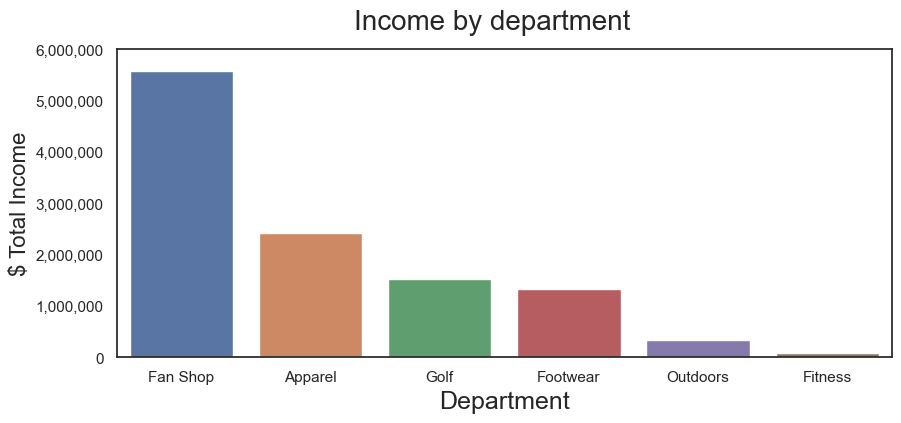

In [72]:
sns.set_style('white')

fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(
    data=df,
    x='department_name',
    y='income',
    order=df['department_name'],
    ax=ax
)
# prevent scientific notation
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set(ylim=(0, 6e6))
fig.suptitle('Income by department', fontsize=20)
plt.xlabel('Department', fontsize=18)
plt.ylabel('$ Total Income', fontsize=16)


plt.show()

As you just saw, we can use another endpoint, get the data, visualize it and get new insights.

I hope this Notebook is helpful for you.

Star this repo and follow me on Twitter: @andresmesad